In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv('student_habits_performance.csv')

In [25]:
#1.EDA

In [3]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [5]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [6]:
len(df.isnull())

1000

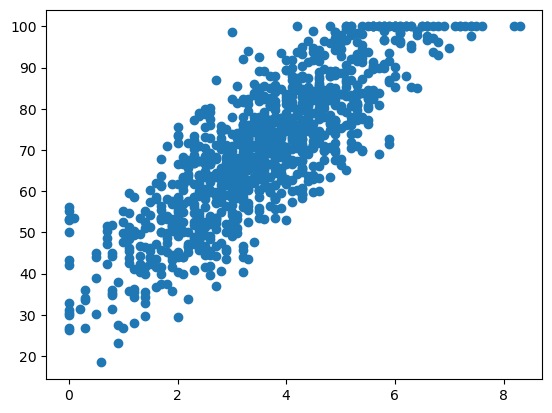

In [7]:
plt.scatter(df['study_hours_per_day'],df['exam_score'])
plt.show()

In [8]:
df.corr(numeric_only=True)['exam_score'].sort_values(ascending=False)

exam_score               1.000000
study_hours_per_day      0.825419
mental_health_rating     0.321523
exercise_frequency       0.160107
sleep_hours              0.121683
attendance_percentage    0.089836
age                     -0.008907
social_media_hours      -0.166733
netflix_hours           -0.171779
Name: exam_score, dtype: float64

In [9]:
# 2.Feature Engineering and Feature selection for the model
df['study_to_distraction_ratio']=df['study_hours_per_day']/(df['social_media_hours']+df['netflix_hours']+1)
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,study_to_distraction_ratio
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,0.000000
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,1.131148
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,0.259259
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,0.169492
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,0.847458


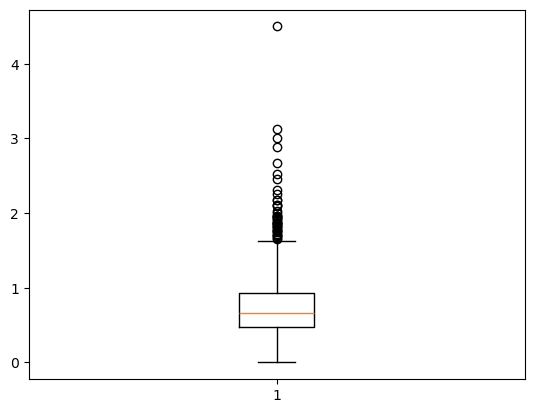

In [10]:
plt.boxplot(df['study_to_distraction_ratio'])
plt.show()

In [11]:
X = df[['study_hours_per_day','mental_health_rating','exercise_frequency','social_media_hours','netflix_hours','study_to_distraction_ratio']]
Y = df['exam_score']

In [12]:
# 3.splitting the data into training and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=40)

In [13]:
# training the model : linear regression
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,Y_train)


LinearRegression()

In [14]:
Y_pred=LR.predict(X_test)

In [15]:
#evaluating the model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test,Y_pred)
mse

35.9495222626824

In [16]:
rmse=np.sqrt(mse)
rmse

5.995792046317351

In [17]:
from sklearn.metrics import r2_score
test=r2_score(Y_test,Y_pred)
test

0.8659161655543304

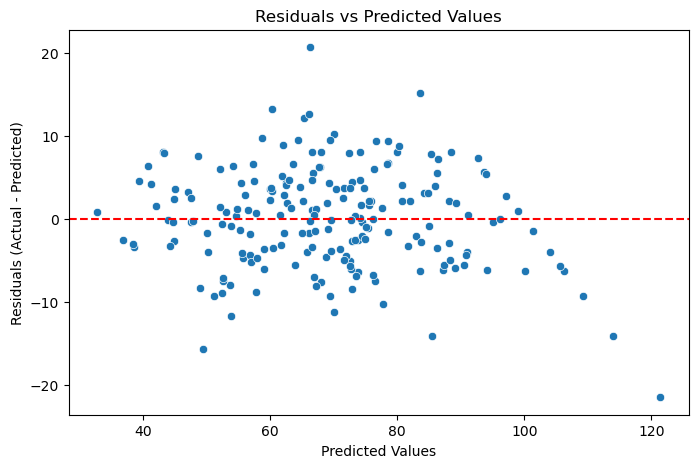

In [18]:
#plotting the residual analysis
residuals = Y_test - Y_pred
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.scatterplot(x=Y_pred,y=residuals) 
plt.axhline(y=0, color='r',linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted Values')
plt.show()

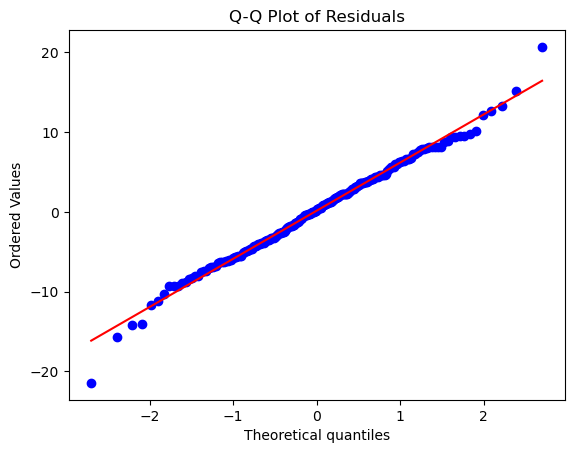

In [19]:
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(residuals,dist="norm",plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [20]:
X.head()

,study_hours_per_day,mental_health_rating,exercise_frequency,social_media_hours,netflix_hours,study_to_distraction_ratio
0,0.0,8,6,1.2,1.1,0.000000
1,6.9,8,6,2.8,2.3,1.131148
2,1.4,1,1,3.1,1.3,0.259259
3,1.0,1,4,3.9,1.0,0.169492
4,5.0,1,3,4.4,0.5,0.847458


In [21]:
Y.head()

0     56.2
1    100.0
2     34.3
3     26.8
4     66.4
Name: exam_score, dtype: float64

In [24]:
#predicting the new and unseen data
import pandas as pd
new_df = pd.DataFrame([{
    'study_hours_per_day': 2,
    'mental_health_rating': 5,
    'exercise_frequency': 4,
    'social_media_hours': 6.2,
    'netflix_hours': 5,
    'study_to_distraction_ratio': 1.1311}])
predicted_score = LR.predict(new_df)
predicted_score

array([39.69438749])